In [1]:
import pickle

ts = pickle.load(open('../../PNC_Good/PNC_SPM_rest.pkl', 'rb'))
demo = pickle.load(open('../../PNC_Good/PNC_agesexwrat.pkl', 'rb'))

print(len(list(ts.keys())))
print(list(demo.keys()))

1394
['age', 'sex', 'wrat', 'missingage', 'missingsex', 'missingwrat', 'failedqc']


In [2]:
import numpy as np

x = []
y = []

for sub in demo['age'].keys():
    try:
        x.append(ts[str(sub)])
        y.append(demo['age'][sub])
    except KeyError as e:
        print(f'Not found {sub}')
    
x = np.stack(x)
y = np.stack(y)

print(x.shape)
print(y.shape)
print(y[0:2])

Not found 606344359549
Not found 600209790043
Not found 600501204197
Not found 600736853993
Not found 600919368841
Not found 601103590451
Not found 601158669657
Not found 601746465923
Not found 601997922853
Not found 602653931131
Not found 602893715810
Not found 602934228085
Not found 603017867359
Not found 603061555716
Not found 603217049035
Not found 603295853736
Not found 603582836872
Not found 603930269891
Not found 603969800842
Not found 604063558268
Not found 604572887538
Not found 604847970437
Not found 604853384855
Not found 604876268454
Not found 605089033284
Not found 605090208362
Not found 605177834950
Not found 605403737627
Not found 606282991680
Not found 606401256970
Not found 606688736331
Not found 607030326315
Not found 607184320790
Not found 607390242095
Not found 607620452870
Not found 608008202241
Not found 608115879657
Not found 608149147993
Not found 608181964473
Not found 608277298234
Not found 608423459770
Not found 608705674075
Not found 608767128938
Not found 6

In [5]:
from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = [cutoff[0] / nyq, cutoff[1] / nyq]
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

tr = 3

a,b = np.triu_indices(264,1)
ps = []
ys = []

for xi,yi in zip(x,y):
    xi = butter_bandpass_filter(xi, [0.01, 0.15], 1/tr)
    p = np.corrcoef(xi)
    if np.sum(np.isnan(p)) > 0:
        continue
    ps.append(p[a,b])
    ys.append(yi)

ys = np.stack(ys)
ps = np.stack(ps)

print(ps.shape)
print(ys.shape)
print('Done')

(873, 34716)
(873,)
Done


In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

def rmse(a,b):
    return np.mean((a-b)**2)**0.5

accs = []
for i in range(50):
    xtr, xt, ytr, yt = train_test_split(ps, ys, train_size=0.6)

    reg = Ridge().fit(xtr, ytr)
    yhat = reg.predict(xt)
    acc = rmse(yhat, yt)
    print(acc)
    accs.append(acc)
    
print('---')
print(np.mean(accs))
print(np.std(accs))

29.40733854685393
28.20389029536394
28.97222211947692
29.830474219783333
29.585091640111337
30.064858870764816
29.100361186127113
27.318692369813185
30.7040096667232
29.2981368300146
30.401794419690766
30.341178155617364
29.377330172343687
29.132623845397635
28.70094855607545
29.186959393734167
30.318623246477188
28.05855676894899
30.078704775367072
29.999192141701233
29.09061824662953
28.538282903147582
28.419654908463155
29.011012247745832
30.496386101572543
29.093675852264727
28.6560739093198
31.233694600867594
29.881422364998883
28.01752655407016
30.338804870845294
28.91676563537521
29.616825805992356
28.18545698136897
30.19119251027226
28.9046084928739
29.30245197180901
28.66328152280133
29.465619324354236
28.530896413475816
29.157708281076992
30.62537418501606
29.193572508345724
30.756154162767494
29.737054932880778
31.03849225464071
29.460835182711175
30.172515131120203
28.901769887846804
29.97068956106114
---
29.432988090522027
0.8467851459874917


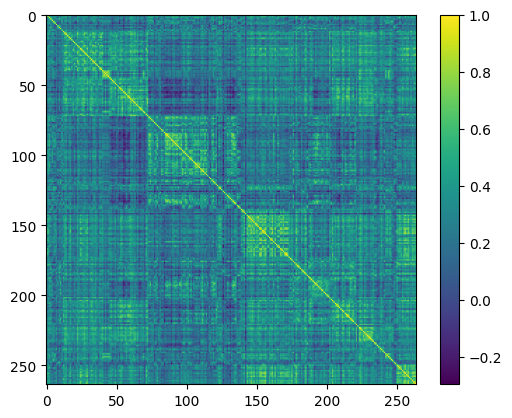

In [14]:
import matplotlib.pyplot as plt

plt.imshow(p)
plt.colorbar()
plt.show()